BLG 307 - YAPAY ZEKA SİSTEMLERİ PROJE TESLİMİ:

Adınız: Ali

Soyadınız: Uçma

Okul Numaranız: 2212721007

GitHub Repo Bağlantısı: https://github.com/Alu0320/genetik_optimizasyon

--- Senaryo 7: Numune Karışımı Optimizasyonu ---
Gen   0 | En iyi: [70, 30] | Fitness: 1920.00
Gen  10 | En iyi: [70, 30] | Fitness: 1920.00
Gen  20 | En iyi: [69, 31] | Fitness: 1927.50
Gen  30 | En iyi: [69, 31] | Fitness: 1927.50
Gen  40 | En iyi: [68, 32] | Fitness: 1932.00
Gen  50 | En iyi: [68, 32] | Fitness: 1932.00
Gen  60 | En iyi: [67, 33] | Fitness: 1933.50
Gen  70 | En iyi: [67, 33] | Fitness: 1933.50
Gen  80 | En iyi: [67, 33] | Fitness: 1933.50
Gen  90 | En iyi: [67, 33] | Fitness: 1933.50
Gen  99 | En iyi: [67, 33] | Fitness: 1933.50

=== SONUÇ ===
En iyi karışım: x1 = %67, x2 = %33
Kısıt sağlanıyor mu?: True
Amaç fonksiyonu: 1933.5
Toplam oran: 100


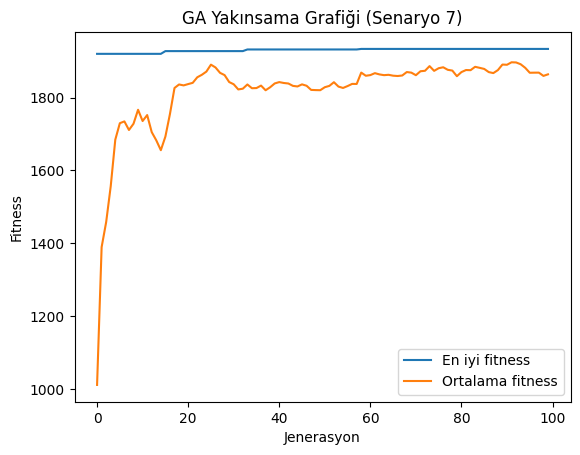

In [23]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Tekrarlanabilirlik (istersen teslimde kaldırabilirsin)
random.seed(42)
np.random.seed(42)

# =====================================================
# AMAÇ FONKSİYONU
# y = 3x1 + 2x2 + x1*x2 - 0.5*x2^2
# =====================================================
def amac_fonksiyonu(x1, x2):
    return 3*x1 + 2*x2 + x1*x2 - 0.5*(x2**2)

# =====================================================
# KISIT KONTROLÜ
# =====================================================
def kisit_saglanir_mi(x1, x2):
    if not (25 <= x1 <= 80):
        return False
    if not (10 <= x2 <= 80):
        return False
    if x1 + x2 > 100:
        return False
    return True

# =====================================================
# RASTGELE BİREY ÜRETİMİ
# =====================================================
def rastgele_birey_uret():
    x1 = random.randint(25, 80)
    max_x2 = min(80, 100 - x1)
    x2 = random.randint(10, max_x2)
    return [x1, x2]

# =====================================================
# POPÜLASYON
# =====================================================
def populasyon_uret(pop_boyutu):
    return [rastgele_birey_uret() for _ in range(pop_boyutu)]

# =====================================================
# FITNESS (CEZA YÖNTEMİ)
# =====================================================
def fitness(birey):
    x1, x2 = birey
    skor = amac_fonksiyonu(x1, x2)
    ceza = 0

    if x1 < 25:
        ceza += (25 - x1) * 1000
    if x1 > 80:
        ceza += (x1 - 80) * 1000
    if x2 < 10:
        ceza += (10 - x2) * 1000
    if x2 > 80:
        ceza += (x2 - 80) * 1000
    if x1 + x2 > 100:
        ceza += ((x1 + x2) - 100) * 500

    return skor - ceza

# =====================================================
# ROULETTE SEÇİMİ
# =====================================================
def rulet_tekerlegi_secimi(populasyon):
    fitness_degerleri = np.array([fitness(b) for b in populasyon])

    min_fit = fitness_degerleri.min()
    if min_fit < 0:
        fitness_degerleri = fitness_degerleri - min_fit + 1

    olasiliklar = fitness_degerleri / fitness_degerleri.sum()
    index = np.random.choice(len(populasyon), p=olasiliklar)
    return populasyon[index]

# =====================================================
# ÇAPRAZLAMA (UNIFORM)
# =====================================================
def caprazlama(p1, p2, oran=0.9):
    if random.random() > oran:
        return p1[:], p2[:]

    c1 = [p1[0] if random.random() < 0.5 else p2[0],
          p1[1] if random.random() < 0.5 else p2[1]]

    c2 = [p2[0] if random.random() < 0.5 else p1[0],
          p2[1] if random.random() < 0.5 else p1[1]]

    return c1, c2

# =====================================================
# BİREY ONARMA
# =====================================================
def birey_onar(birey):
    x1, x2 = map(int, map(round, birey))

    x1 = max(25, min(80, x1))
    x2 = max(10, min(80, x2))

    if x1 + x2 > 100:
        x2 = max(10, 100 - x1)

    return [x1, x2]

# =====================================================
# MUTASYON (YUMUŞATILMIŞ)
# =====================================================
def mutasyon(birey, oran=0.1):
    x1, x2 = birey

    if random.random() < oran:
        x1 += random.choice([-1, 1])
    if random.random() < oran:
        x2 += random.choice([-1, 1])

    return birey_onar([x1, x2])

# =====================================================
# GENETİK ALGORİTMA
# =====================================================
def genetik_algoritma(pop_boyutu=40,
                      jenerasyon_sayisi=100,
                      caprazlama_orani=0.9,
                      mutasyon_orani=0.1,
                      elitizm=True):

    populasyon = populasyon_uret(pop_boyutu)
    en_iyi_list = []
    ort_list = []

    for gen in range(jenerasyon_sayisi):
        populasyon.sort(key=fitness, reverse=True)

        en_iyi = populasyon[0]
        en_iyi_fit = fitness(en_iyi)
        ort_fit = np.mean([fitness(b) for b in populasyon])

        en_iyi_list.append(en_iyi_fit)
        ort_list.append(ort_fit)

        if gen % 10 == 0 or gen == jenerasyon_sayisi - 1:
            print(f"Gen {gen:3d} | En iyi: {en_iyi} | Fitness: {en_iyi_fit:.2f}")

        yeni_pop = []
        if elitizm:
            yeni_pop.append(en_iyi[:])

        while len(yeni_pop) < pop_boyutu:
            p1 = rulet_tekerlegi_secimi(populasyon)
            p2 = rulet_tekerlegi_secimi(populasyon)

            c1, c2 = caprazlama(p1, p2, caprazlama_orani)
            yeni_pop.append(mutasyon(c1, mutasyon_orani))
            if len(yeni_pop) < pop_boyutu:
                yeni_pop.append(mutasyon(c2, mutasyon_orani))

        populasyon = yeni_pop

    populasyon.sort(key=fitness, reverse=True)
    return populasyon[0], en_iyi_list, ort_list

# =====================================================
# ÇALIŞTIRMA
# =====================================================
if __name__ == "__main__":

    print("--- Senaryo 7: Numune Karışımı Optimizasyonu ---")
    en_iyi, en_iyiler, ortalamalar = genetik_algoritma()

    x1, x2 = en_iyi

    print("\n=== SONUÇ ===")
    print(f"En iyi karışım: x1 = %{x1}, x2 = %{x2}")
    print("Kısıt sağlanıyor mu?:", kisit_saglanir_mi(x1, x2))
    print("Amaç fonksiyonu:", amac_fonksiyonu(x1, x2))
    print("Toplam oran:", x1 + x2)

    plt.figure()
    plt.plot(en_iyiler, label="En iyi fitness")
    plt.plot(ortalamalar, label="Ortalama fitness")
    plt.xlabel("Jenerasyon")
    plt.ylabel("Fitness")
    plt.title("GA Yakınsama Grafiği (Senaryo 7)")
    plt.legend()
    plt.show()
